# TAP - DD2 model coefficients check
- Modified from: `topological-analysis-of-subvolumes/documentation/discuss/topotap.ipynb`
- Requires Vishal's TAP kernel: `/gpfs/bbp.cscs.ch/home/sood/work/workspaces/venvs/py39/bin/activate`

Let us setup an interactive `Python` session where we can run the code
developed here.

``` jupyter
print("Welcome to EMACS Jupyter")
```

We develop topological analyses of brain circuits, and implement
`Python` code that we can use with to configure a `connsense-pipeline`.
Instead of the connectivity of the whole circuit *Mosaic*, our focus
will be `circuit-subtargets` that are geometrically defined. We will
start by describing how to configure a `connsense-pipeline`, run it, and
use `connsensnse-tap` to access and analyze the data.

# Setup

In our discussion we will develop scientific concepts to measure the
circuit, and implement Python functions to compute them. Here we setup a
notebook template to test and explore, and the structure of a `Python`
package for our methods.

To get the notebook you will have to clone,

``` shell
git clone https://bbpgitlab.epfl.ch/conn/structural/topological-analysis-of-subvolumes.git
git checkout beta
```

In [1]:
from importlib import reload
from collections.abc import Mapping
from collections import OrderedDict
from pprint import pprint, pformat
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib

reload(matplotlib)
from matplotlib import pylab as plt
import seaborn as sbn

from IPython.display import display

from bluepy import Synapse, Cell, Circuit

GOLDEN = (1. + np.sqrt(5.))/2.
print("We will plot golden aspect ratios: ", GOLDEN)


We will plot golden aspect ratios:  1.618033988749895


``` example
We will plot golden aspect ratios:  1.618033988749895
```

## Workspaces

We have run `connsense-CRAP` for the SSCx dissemination variant *Bio-M*,
extracting data that we will use to compute the factology. Here is a
list of workspaces we will need to generate factsheets.

In [2]:
ROOTSPACE = Path("/")
PROJSPACE = ROOTSPACE / "gpfs/bbp.cscs.ch/project/proj83"
SOODSPACE = PROJSPACE / "home/sood"
CONNSPACE = SOODSPACE / "topological-analysis-subvolumes/test/v2"
DEVSPACE  = CONNSPACE / "test" / "develop"


## `connsense` Modules

While test-developing it will be good to have direct access to the
`connsense-TAP-store` we will use. We will use a module from `connsense`
to load the HDFstore,

In [3]:
from connsense.develop import topotap as cnstap
tap = cnstap.HDFStore(CONNSPACE/"pipeline.yaml")
circuit = tap.get_circuit("Bio_M")
print("Available analyses: ")
pprint(tap.analyses)
circuit


 2023-07-04 07:41:04,591: Load circuit Bio_M


Available analyses: 
{'connectivity': {'cross-col-k-indegree': <connsense.develop.topotap.TapDataset object at 0x2aaafc9891c0>,
                  'model-params-dd2': <connsense.develop.topotap.TapDataset object at 0x2aaafc989370>,
                  'node-participation': <connsense.develop.topotap.TapDataset object at 0x2aaafc989310>,
                  'simplex-counts': <connsense.develop.topotap.TapDataset object at 0x2aaab9908ee0>,
                  'thalamic-innervation': <connsense.develop.topotap.TapDataset object at 0x2aaafc989520>,
                  'wm-innervation': <connsense.develop.topotap.TapDataset object at 0x2aaafc9894f0>}}


# Introduction

We will study flatmap columns. In the circuit's flatmap we have the
following grid,

In [4]:
from flatmap_utility import subtargets as fmst
fmst.fmap_positions(circuit, over_flatmap_voxels=None, with_orientations=None,
                    to_subpixel_resolution=True, dropna=True)


/gpfs/bbp.cscs.ch/project/proj83/analyses/topological-analysis-subvolumes/proj83/topological-analysis-of-subvolumes/flatmap_utility/flatmap_utility.py:199: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  res = Rotation.align_vectors(vtgt, vv)


Rotation errors: min: 0.0, median: 0.09387602600937707, mean: 0.1362824184485066, std: 0.15664142313770807, max: 2.0


,x,y
gid,,
1,2070.254580,2941.901129
2,2716.594415,2687.716832
3,1383.068384,1163.944134
4,1265.374093,1331.794667
5,2228.382838,4131.306090
...,...,...
4234925,2402.376474,534.494432
4234926,5337.546887,3190.549809
4234927,773.076963,6266.401067


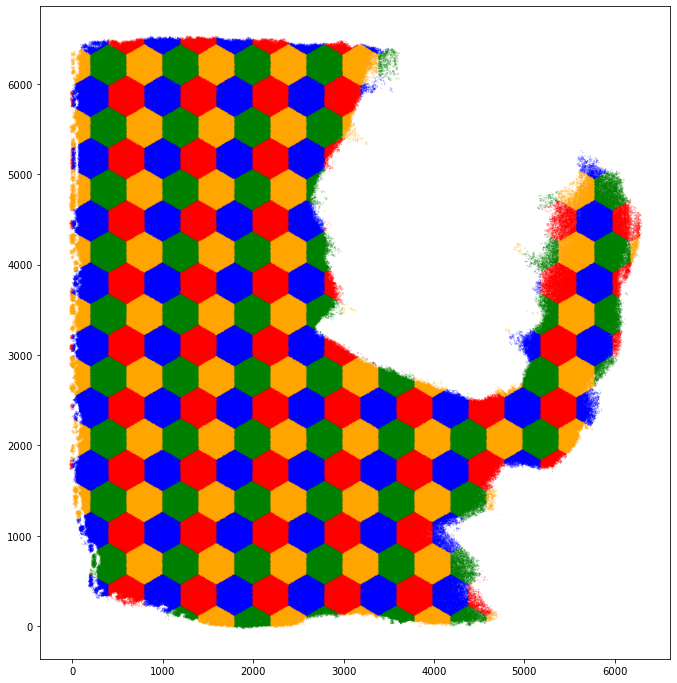

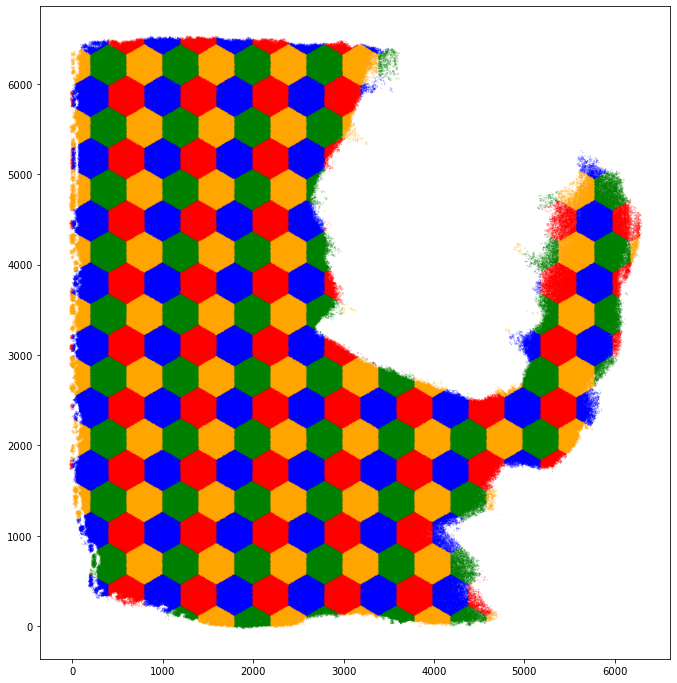

In [5]:
from flatmap_utility import subtargets as fmst, tessellate
flat_xys = fmst.fmap_positions(in_data=circuit)
tritille = tessellate.TriTille(230.0)
graphic_fmap_cells = tritille.plot_hextiles(flat_xys,
                                            annotate=False, with_grid=False, pointmarker=".", pointmarkersize=0.05)
graphic_fmap_cells[0]


``` example
/gpfs/bbp.cscs.ch/project/proj83/analyses/topological-analysis-subvolumes/proj83/topological-analysis-of-subvolumes/flatmap_utility/flatmap_utility.py:199: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  res = Rotation.align_vectors(vtgt, vv)
Rotation errors: min: 0.0, median: 0.09387602600937707, mean: 0.1362824184485066, std: 0.15664142313770807, max: 2.0
```

<!-- ![](attachment:./figures/flatmap.png) -->

# Pipeline: TODO

# TAP CLI

# Subtargets

We have information about subtargets in `tap`,

In [6]:
display(tap.subtargets)


 2023-07-04 07:45:21,479: Load dataset ('define-subtargets', 'flatmap-columns'): 
('Hexaongal prism like columns oriented along cortical layers, from '
 'white-matter to pia.  The data is loaded from an NRRD file that maps each '
 'circuit voxel to a subtarget ids corresponding to a flatmap column.The '
 'subtarget ids should be mapped to the subtargets they refer to in a '
 'dataframe provided as the input `info`.')


,subtarget,flat_i,flat_j,flat_x,flat_y,conicality,volume,height
subtarget_id,,,,,,,,
1,R18;C0,-27,27,3.802528e-13,6210.0,NaN,NaN,NaN
2,R19;C0,-28,29,1.991858e+02,6555.0,NaN,NaN,NaN
3,R18;C1,-26,28,3.983717e+02,6210.0,-0.001376,2.049209e+08,1640.357801
4,R19;C1,-27,30,5.975575e+02,6555.0,NaN,NaN,NaN
5,R16;C0,-24,24,3.380025e-13,5520.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
236,R4;C12,6,18,4.780460e+03,1380.0,NaN,NaN,NaN
237,R9;C15,2,29,6.174761e+03,3105.0,NaN,NaN,NaN
238,R15;C13,-9,36,5.378018e+03,5175.0,NaN,NaN,NaN


Each one is a straight up cylinderical column in the flatmap-space, and
a conical column in circuit's physical space. Each `subtarget` is
associated with a list of gids,

 2023-07-04 07:45:24,901: Load dataset ('define-subtargets', 'flatmap-columns'): 
('Hexaongal prism like columns oriented along cortical layers, from '
 'white-matter to pia.  The data is loaded from an NRRD file that maps each '
 'circuit voxel to a subtarget ids corresponding to a flatmap column.The '
 'subtarget ids should be mapped to the subtargets they refer to in a '
 'dataframe provided as the input `info`.')


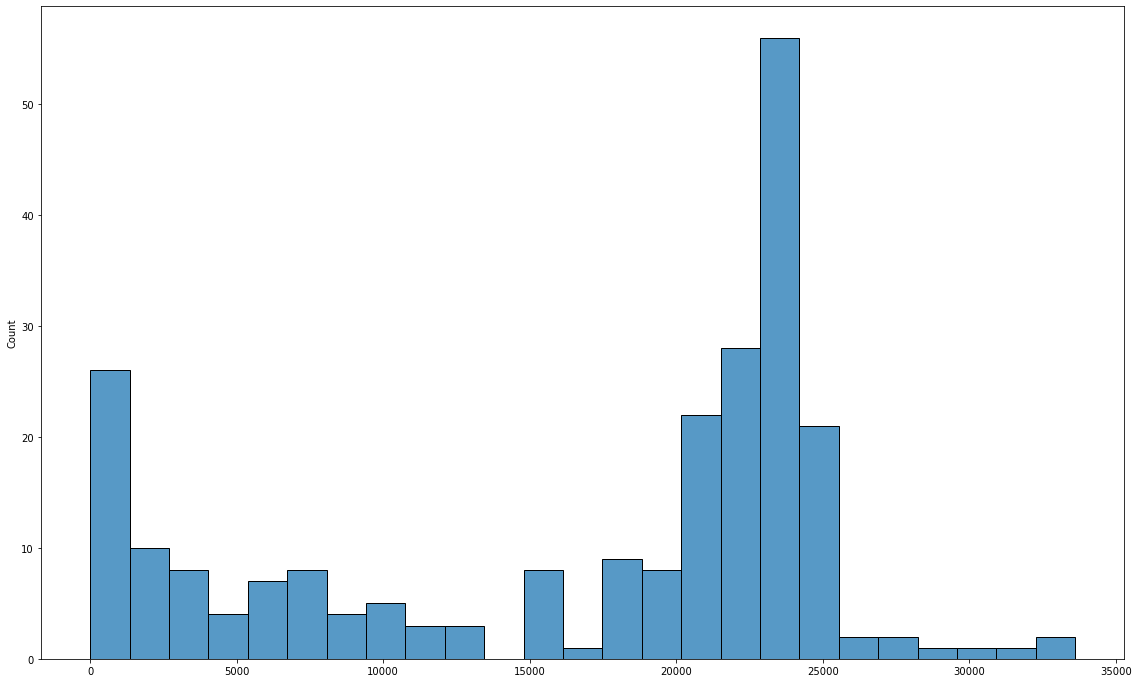

In [7]:
fig_subtarget_sizes = plt.figure(figsize=(GOLDEN * 12, 12))

ax = sbn.histplot(tap.subtarget_gids.apply(len).values, bins=25,
                  ax=fig_subtarget_sizes.add_subplot())


We have `subtargets`' `conicality, volume, and height` in the `info`. We
may not be able to compute these values for each `flatmap-column`. Some
may have a geometry that does not resolve to our computations. The `nan`
values for `conicality` are found in,

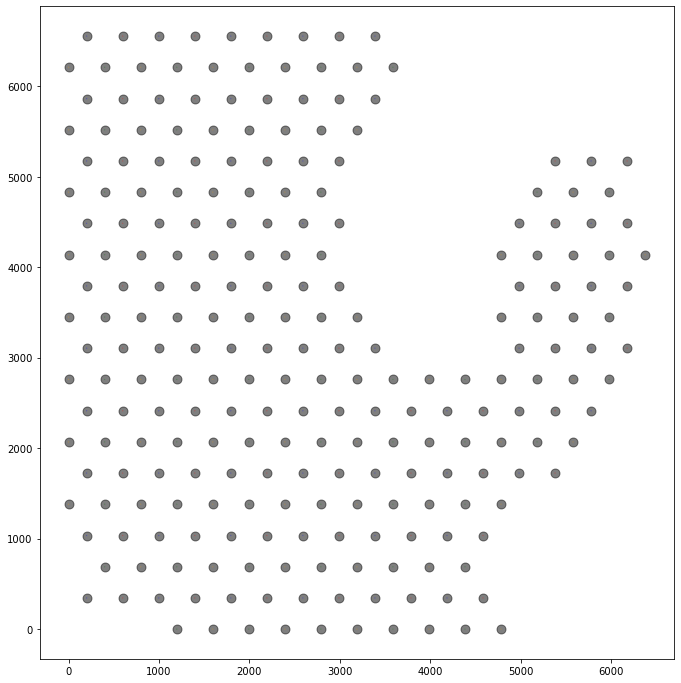

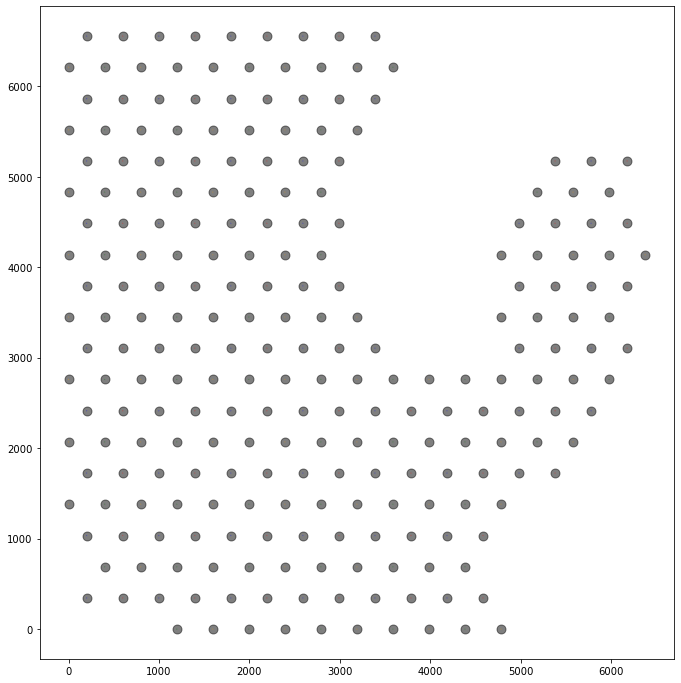

In [8]:
flat_xy = OrderedDict([("flat_x", "x"), ("flat_y", "y")])
nanxys = tap.subtargets[list(flat_xy.keys())].rename(columns=flat_xy)

graphic_nanfmap = tritille.plot_hextiles(nanxys, annotate=False)
graphic_nanfmap[0]


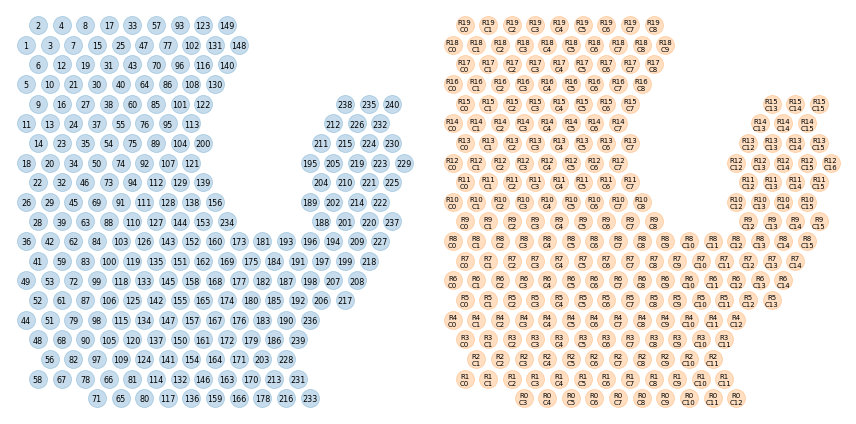

In [9]:
# CP: Manually plot sub-volumes
nanxys = tap.subtargets[list(flat_xy.keys()) + ["subtarget"]].rename(columns=flat_xy)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(nanxys["x"], nanxys["y"], 'o', markersize=18, alpha=0.25, color="tab:blue")
for idx, row in nanxys.iterrows():
    plt.text(row["x"], row["y"], str(idx), ha="center", va="center_baseline", fontsize=8)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.plot(nanxys["x"], nanxys["y"], 'o', markersize=18, alpha=0.25, color="tab:orange")
for idx, row in nanxys.iterrows():
    plt.text(row["x"], row["y"], row["subtarget"].replace(";", "\n"), ha="center", va="center_baseline", fontsize=7)
plt.axis("off")
plt.tight_layout()
plt.show()

# Nodes

We extract node properties as `extract-node-populations/default`, and
can access the node-properties using `tap`,

In [10]:
nodes = cnstap.TapDataset(tap, ("extract-node-populations", "default"), belazy=False)


As you can tell from the numbers that the `nodes` dataframe contains all
the nodes in all the subtargets (*i.e* all circuit nodes except those
that could not be flatmapped). This dataframe is no different from the
`circuit.cells` one, except that the `subtarget` is avaialble in the
index,

In [11]:
display(nodes.frame[ ["gid", "layer", "mtype"] ].head())


 2023-07-04 07:46:40,412: Initialize a DataFrameStore matrix store loading / writing data at /gpfs/bbp.cscs.ch/project/proj83/home/sood/topological-analysis-subvolumes/test/v2/connsense.h5 / nodes/populations/default
 2023-07-04 07:47:32,473: Frame TapDataset (extract-node-populations/default) component None


gid  layer     mtype
subtarget circuit node_id                          
R18;C0    Bio_M   0        1636113      6    L6_IPC
                  1         996599      6    L6_UPC
                  2        3524820      5    L5_UPC
                  3          14591      3  L3_TPC:A
                  4        4075085      5  L5_TPC:A

Notice the `node_id` which is not the same as `gid`. The `node_id` value
is local to the `subtarget`.

# Adjacency matrices

Adjacency matrices for edges in the local connectome were extracted as
`extract-edge-populations/local`. This data is stored as sparse
matrices, and hence using `.frame` on the non-lazy data not make much
sense. The data is also much larger than nodes. We should stick to the
lazy `datacalls` loaded by `tap`,

In [12]:
display(tap.adjacency["local"].frame.head())


 2023-07-04 07:49:23,572: Load dataset ('extract-edge-populations', 'local'): 
'NotAvailable'
 2023-07-04 07:49:23,578: Load dataset ('extract-edge-populations', 'long-range-cross'): 
'NotAvailable'
 2023-07-04 07:49:23,579: Load dataset ('extract-edge-populations', 'local-cross'): 
'NotAvailable'
 2023-07-04 07:49:23,714: Frame TapDataset (extract-edge-populations/local) component None


subtarget  circuit  connectome
R18;C0     Bio_M    local         <connsense.develop.parallelization.DataCall ob...
R19;C0     Bio_M    local         <connsense.develop.parallelization.DataCall ob...
R18;C1     Bio_M    local         <connsense.develop.parallelization.DataCall ob...
R19;C1     Bio_M    local         <connsense.develop.parallelization.DataCall ob...
R16;C0     Bio_M    local         <connsense.develop.parallelization.DataCall ob...
dtype: object

Each entry can be expanded when needed,

In [13]:
adj = tap.adjacency["local"].dataset.iloc[0]()

print("matrix of type", type(adj), "and shape", adj.shape,
      "number of connections", adj.astype(bool).sum())


matrix of type <class 'scipy.sparse.csr.csr_matrix'> and shape (4570, 4570) number of connections 431358


# Analyses

## Simplex counts

We already have results for simplex-counts in a `tap-store` resulting
from a run of the \~connsense-pipeline- developed in <span
class="spurious-link" target="Pipeline">*Pipeline*</span>. Let us load
the simplex-counts,

In [14]:
simplex_counts = cnstap.TapDataset(tap, ("analyze-connectivity", "simplex-counts"),
                                   belazy=False)
print("Simplex counts as a %s"%(type(simplex_counts),))


Simplex counts as a <class 'connsense.develop.topotap.TapDataset'>


We have run simplex counts for both the full (original and 5 ER
controls) adjacency matrices, and their slices by layer. We can load the
results for the `full-flatcolumns` as a dataframe,

In [ ]:
simplex_counts.frame["full"]


This computation will take a while, as all the simplex counts, for both
the full and layer will be decompressed from `connsense.h5` and loaded
into a `pandas.DataFrame`. In about a minute you should see the result.
Once loaded, the dataframe will stay with the object
`simplex_counts.frame`. For layers we have an extra level in the index,

In [ ]:
simplex_counts.frame["layer"]


We find a `nan` where no simplices were found. Each individual
computation on a single `flatcolumn` returns an array / series of
simplex counts by dimension *upto* the maximum dimension of simplices
found in that `flatcolumn`. When we concatenated these data into a
single `frame`, the max-dimension was set to the maximum of maxima over
all `flatcolumns` (and their randomizations). This filled in `nan`
values for `flatcolumns` that did not have the higher missing
dimensions. While we can replace the `nans` by zeros, as that is what
they mean, they do offer a convenient way to compute the max-dimension,

In [ ]:
from tqdm import tqdm; tqdm.pandas()

maxdim = (simplex_counts.frame["full"]
          .apply(lambda subtarget: len(subtarget.dropna()), axis=1)
          .rename("dim"))

display(maxdim)


which we can convert to a plot,

In [ ]:
fig_maxdim = plt.figure(figsize=(GOLDEN * 8, 8))
_ax = sbn.violinplot(x="control", y="dim", data=maxdim.reset_index(),
                     ax=fig_maxdim.add_subplot())
fig_maxdim


What about each layer?

In [ ]:
maxdim_by_layer = (simplex_counts.frame["layer"]
                   .apply(lambda subtarget: len(subtarget.dropna()), axis=1)
                   .rename("dim"))

display(maxdim_by_layer)


and it looks like,

In [ ]:
fig_maxdim_by_layer = plt.figure(figsize=(GOLDEN * 8, 8))
_ax = sbn.violinplot(x="control", y="dim", hue="layer", data=maxdim_by_layer.reset_index(),
                     ax=fig_maxdim_by_layer.add_subplot())
fig_maxdim_by_layer


## Model Params DD2

Loading the results for second order distance dependent model is similar
to simplex counts,

In [19]:
params_dd2 = cnstap.TapDataset(tap, ("analyze-connectivity", "model-params-dd2"),
                               belazy=False)
display(params_dd2.frame)


 2023-07-04 07:50:35,980: Pour analyses for analyze-connectivity quantity model-params-dd2
 2023-07-04 07:50:35,981: Initialize a DataFrameStore matrix store loading / writing data at /gpfs/bbp.cscs.ch/project/proj83/home/sood/topological-analysis-subvolumes/test/v2/connsense.h5 / analyses/connectivity/model-params-dd2
 2023-07-04 07:50:39,710: Frame TapDataset (analyze-connectivity/model-params-dd2) component None


,,,,exp_model_scale,exp_model_exponent
subtarget,circuit,connectome,seed,,
R18;C0,Bio_M,local,NaN,0.098400,0.004637
R19;C0,Bio_M,local,NaN,0.091357,0.003775
R18;C1,Bio_M,local,NaN,0.112809,0.006918
R19;C1,Bio_M,local,NaN,0.097548,0.004989
R16;C0,Bio_M,local,NaN,0.100006,0.004807
...,...,...,...,...,...
R15;C14,Bio_M,local,NaN,0.128182,0.007200
R4;C12,Bio_M,local,NaN,0.129887,0.008113
R9;C15,Bio_M,local,NaN,0.101842,0.003990


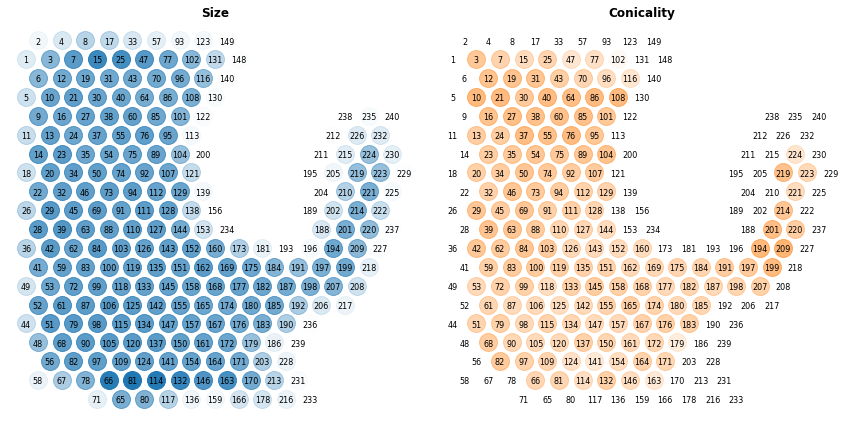

In [20]:
# CP: Visualize column sizes (#neurons) & conicality
sub_size = tap.subtarget_gids.apply(len)
nanxys = tap.subtargets[list(flat_xy.keys()) + ["subtarget"]].rename(columns=flat_xy)
nanxys["size"] = sub_size.loc[nanxys.index].values
nanxys["conicality"] = tap.subtargets["conicality"].loc[nanxys.index].values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for idx, row in nanxys.iterrows():
    if np.isfinite(row["size"]):
        plt.plot(row["x"], row["y"], 'o', markersize=18, alpha=row["size"] / nanxys["size"].max(), color="tab:blue")
    plt.text(row["x"], row["y"], str(idx), ha="center", va="center_baseline", fontsize=8)
plt.axis("off")
plt.title('Size', fontweight="bold")
x_limit = plt.xlim()
y_limit = plt.ylim()
plt.subplot(1, 2, 2)
for idx, row in nanxys.iterrows():
    if np.isfinite(row["conicality"]):
        plt.plot(row["x"], row["y"], 'o', markersize=18, alpha=0.5 + 0.5 * row["conicality"] / nanxys["conicality"].abs().max(), color="tab:orange")
    plt.text(row["x"], row["y"], str(idx), ha="center", va="center_baseline", fontsize=8)
plt.axis("off")
plt.title('Conicality', fontweight="bold")
plt.xlim(x_limit)
plt.ylim(y_limit)
plt.tight_layout()
plt.show()

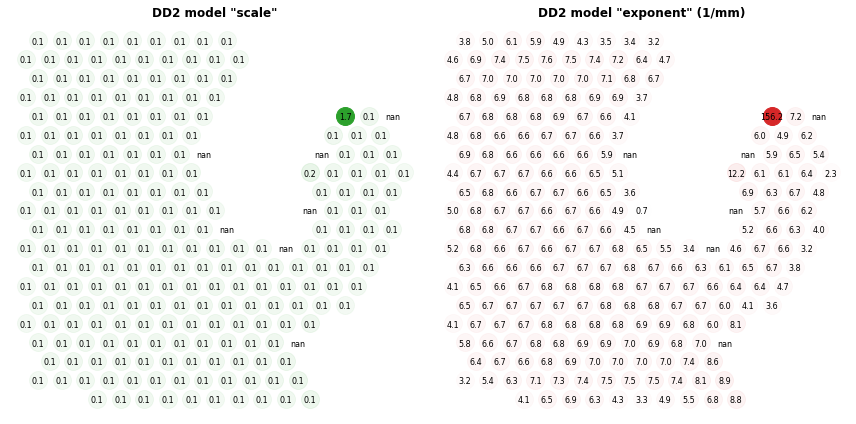

In [21]:
# CP: Visualize model parameters
dd2_frame = params_dd2.frame.droplevel([1, 2, 3])
nanxys = tap.subtargets[list(flat_xy.keys()) + ["subtarget"]].rename(columns=flat_xy)
nanxys["size"] = sub_size.loc[nanxys.index].values
nanxys["conicality"] = tap.subtargets["conicality"].loc[nanxys.index].values
nanxys["scale"] = np.nan
nanxys["exponent"] = np.nan
dd2_sel = np.isin(nanxys["subtarget"], dd2_frame.index)  # Select subtargets for which DD2 model exists
nanxys.loc[dd2_sel, "scale"] = dd2_frame.loc[nanxys["subtarget"].loc[dd2_sel]]["exp_model_scale"].values
nanxys.loc[dd2_sel, "exponent"] = dd2_frame.loc[nanxys["subtarget"].loc[dd2_sel]]["exp_model_exponent"].values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for idx, row in nanxys.iterrows():
    if np.isfinite(row["scale"]):
        plt.plot(row["x"], row["y"], 'o', markersize=18, alpha=row["scale"] / nanxys["scale"].max(), color="tab:green")
    # plt.text(row["x"], row["y"], str(idx), ha="center", va="center_baseline", fontsize=8)
    plt.text(row["x"], row["y"], f"{row['scale']:.1f}", ha="center", va="center_baseline", fontsize=8)
plt.axis("off")
plt.title('DD2 model "scale"', fontweight="bold")
plt.subplot(1, 2, 2)
for idx, row in nanxys.iterrows():
    if np.isfinite(row["exponent"]):
        plt.plot(row["x"], row["y"], 'o', markersize=18, alpha=row["exponent"] / nanxys["exponent"].max(), color="tab:red")
    # plt.text(row["x"], row["y"], str(idx), ha="center", va="center_baseline", fontsize=8)
    plt.text(row["x"], row["y"], f"{row['exponent'] * 1e3:.1f}", ha="center", va="center_baseline", fontsize=8)
plt.axis("off")
plt.title('DD2 model "exponent" (1/mm)', fontweight="bold")
plt.tight_layout()
plt.show()

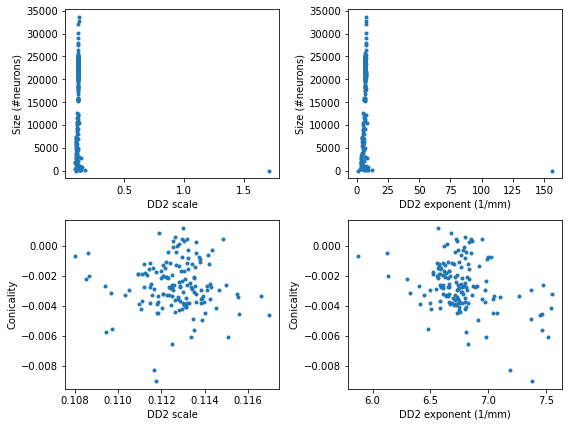

In [22]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.plot(nanxys["scale"], nanxys["size"], '.')
plt.xlabel("DD2 scale")
plt.ylabel("Size (#neurons)")

plt.subplot(2, 2, 2)
plt.plot(nanxys["exponent"] * 1e3, nanxys["size"], '.')
plt.xlabel("DD2 exponent (1/mm)")
plt.ylabel("Size (#neurons)")

plt.subplot(2, 2, 3)
plt.plot(nanxys["scale"], nanxys["conicality"], '.')
plt.xlabel("DD2 scale")
plt.ylabel("Conicality")

plt.subplot(2, 2, 4)
plt.plot(nanxys["exponent"] * 1e3, nanxys["conicality"], '.')
plt.xlabel("DD2 exponent (1/mm)")
plt.ylabel("Conicality")

plt.tight_layout()
plt.show()

### [CP] Compare model fits with actual DD probability

In [33]:
import os
import tqdm
import sys
import importlib
import pickle
from sklearn.metrics import mean_squared_error

# Load modelling module that was used in TAP
mod_path, mod_module = os.path.split(os.path.splitext(tap.parameters["analyze-connectivity"]["analyses"]["model-params-dd2"]["computation"]["source"])[0])
sys.path.append(mod_path)
modelling = importlib.import_module(mod_module)
# mod_name = tap.parameters["analyze-connectivity"]["analyses"]["model-params-dd2"]["computation"]["method"]
# mod_fct = getattr(modelling, mod_name)
# print(f'Loaded modelling function "{mod_fct.__name__}()" from "{modelling.__file__}"')

# Prepare folder to save extracted results
model_path = "/gpfs/bbp.cscs.ch/project/proj102/pokorny/connectome_analysis/DD2_model_fits_validation_v2"
if not os.path.exists(model_path):
    os.mkdir(model_path)

In [ ]:
# Run model building for selected column
sub_ids = list(tap.subtargets.index)  # Add subtarget IDs
model_config = tap.parameters["analyze-connectivity"]["analyses"]["model-params-dd2"]["kwargs"]

def get_bin_centers(bins):
    return np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])

for sid in tqdm.tqdm(sub_ids):
    # Get inputs
    sub_name = tap.subtargets.loc[sid]["subtarget"]
    if not (sid, 0) in tap.nodes.dataset:
        print(f"WARNING: No node set found for sub-target {sid}!")
        continue
    node_props = tap.nodes.dataset.loc[(sid, 0)]()
    adj = tap.adjacency["local"].dataset.loc[(sid, 0, 0)]().astype(bool)

    # Run model building
    model_name = f"TAP_DD2_SubID{sid}"
    if os.path.exists(os.path.join(model_path, model_name + "__MSE.pickle")):
        print(f'INFO: Model "{model_name}" already exists - SKIPPING!')
        continue

    data_dict, model_dict = modelling.run_model_building(adj, node_props, model_name, 2, **model_config, data_dir=model_path, model_dir=model_path, plot_dir=model_path, do_plot=True)
    m_fct = modelling.get_model_function(**model_dict)

    p = data_dict["p_conn_dist"]
    p_d = get_bin_centers(data_dict["dist_bins"])  # Distance at bin centers

    # Check model
    m_coeffs = [model_dict["model_params"][coeff_name] for coeff_name in dd2_frame.columns]
    np.testing.assert_allclose(m_coeffs, dd2_frame.loc[sub_name], rtol=1e-6)

    if np.all(np.isfinite(p)) and np.all(np.isfinite(m_fct(p_d))):
        mse = mean_squared_error(p, m_fct(p_d))  # Mean squared error
    else:
        mse = np.nan
    with open(os.path.join(model_path, model_name + "__MSE.pickle"), "wb") as f:
        pickle.dump({"p_data": p, "p_model": m_fct(p_d), "d": p_d, "MSE": mse}, f)

    plt.close("all")

    # dd2_coeffs = mod_fct(adj, node_props, **model_config)
    # np.testing.assert_allclose(dd2_coeffs.iloc[0], dd2_frame.loc[sub_name])
    

In [37]:
# Collect results (MSE)
model_MSEs = []
for sid in tqdm.tqdm(sub_ids):
    model_name = f"TAP_DD2_SubID{sid}"
    mse_file = os.path.join(model_path, model_name + "__MSE.pickle")
    if not os.path.exists(mse_file):
        model_MSEs.append(np.nan)
        print(f'WARNING: No model MSE for "{model_name}" found!')
        continue

    with open(mse_file, "rb") as f:
        mse_dict = pickle.load(f)
    model_MSEs.append(mse_dict["MSE"])

100%|██████████| 240/240 [00:00<00:00, 1806.45it/s]

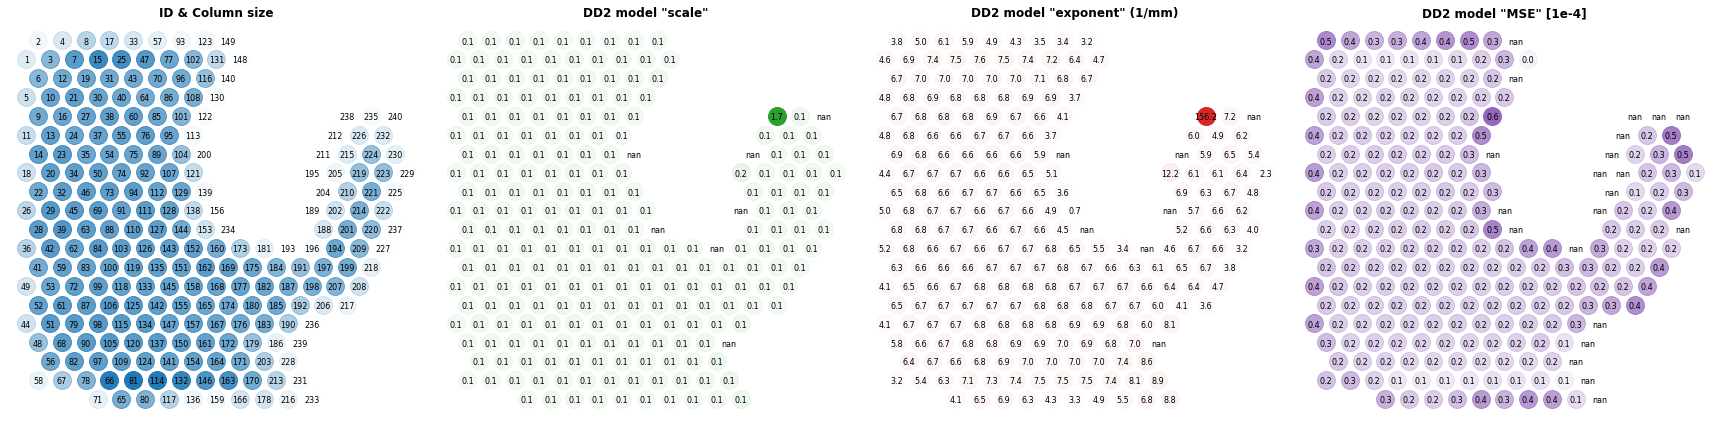

In [40]:
# CP: Visualize MSEs
dd2_frame = params_dd2.frame.droplevel([1, 2, 3])
nanxys = tap.subtargets[list(flat_xy.keys()) + ["subtarget"]].rename(columns=flat_xy)
nanxys["size"] = sub_size.loc[nanxys.index].values
nanxys["conicality"] = tap.subtargets["conicality"].loc[nanxys.index].values
nanxys["scale"] = np.nan
nanxys["exponent"] = np.nan
nanxys["MSE"] = np.nan
dd2_sel = np.isin(nanxys["subtarget"], dd2_frame.index)  # Select subtargets for which DD2 model exists
nanxys.loc[dd2_sel, "scale"] = dd2_frame.loc[nanxys["subtarget"].loc[dd2_sel]]["exp_model_scale"].values
nanxys.loc[dd2_sel, "exponent"] = dd2_frame.loc[nanxys["subtarget"].loc[dd2_sel]]["exp_model_exponent"].values
nanxys.loc[sub_ids, "MSE"] = model_MSEs

plt.figure(figsize=(24, 6))
plt.subplot(1, 4, 1)
for idx, row in nanxys.iterrows():
    if np.isfinite(row["size"]):
        plt.plot(row["x"], row["y"], 'o', markersize=18, alpha=row["size"] / nanxys["size"].max(), color="tab:blue")
    plt.text(row["x"], row["y"], str(idx), ha="center", va="center_baseline", fontsize=8)
plt.axis("off")
plt.title('ID & Column size', fontweight="bold")

plt.subplot(1, 4, 2)
for idx, row in nanxys.iterrows():
    if np.isfinite(row["scale"]):
        plt.plot(row["x"], row["y"], 'o', markersize=18, alpha=row["scale"] / nanxys["scale"].max(), color="tab:green")
    # plt.text(row["x"], row["y"], str(idx), ha="center", va="center_baseline", fontsize=8)
    plt.text(row["x"], row["y"], f"{row['scale']:.1f}", ha="center", va="center_baseline", fontsize=8)
plt.axis("off")
plt.title('DD2 model "scale"', fontweight="bold")

plt.subplot(1, 4, 3)
for idx, row in nanxys.iterrows():
    if np.isfinite(row["exponent"]):
        plt.plot(row["x"], row["y"], 'o', markersize=18, alpha=row["exponent"] / nanxys["exponent"].max(), color="tab:red")
    # plt.text(row["x"], row["y"], str(idx), ha="center", va="center_baseline", fontsize=8)
    plt.text(row["x"], row["y"], f"{row['exponent'] * 1e3:.1f}", ha="center", va="center_baseline", fontsize=8)
plt.axis("off")
plt.title('DD2 model "exponent" (1/mm)', fontweight="bold")

plt.subplot(1, 4, 4)
for idx, row in nanxys.iterrows():
    if np.isfinite(row["MSE"]):
        plt.plot(row["x"], row["y"], 'o', markersize=18, alpha=row["MSE"] / nanxys["MSE"].max(), color="tab:purple")
    # plt.text(row["x"], row["y"], str(idx), ha="center", va="center_baseline", fontsize=8)
    plt.text(row["x"], row["y"], f"{row['MSE'] * 1e4:.1f}", ha="center", va="center_baseline", fontsize=8)
plt.axis("off")
plt.title('DD2 model "MSE" [1e-4]', fontweight="bold")

plt.tight_layout()
plt.show()

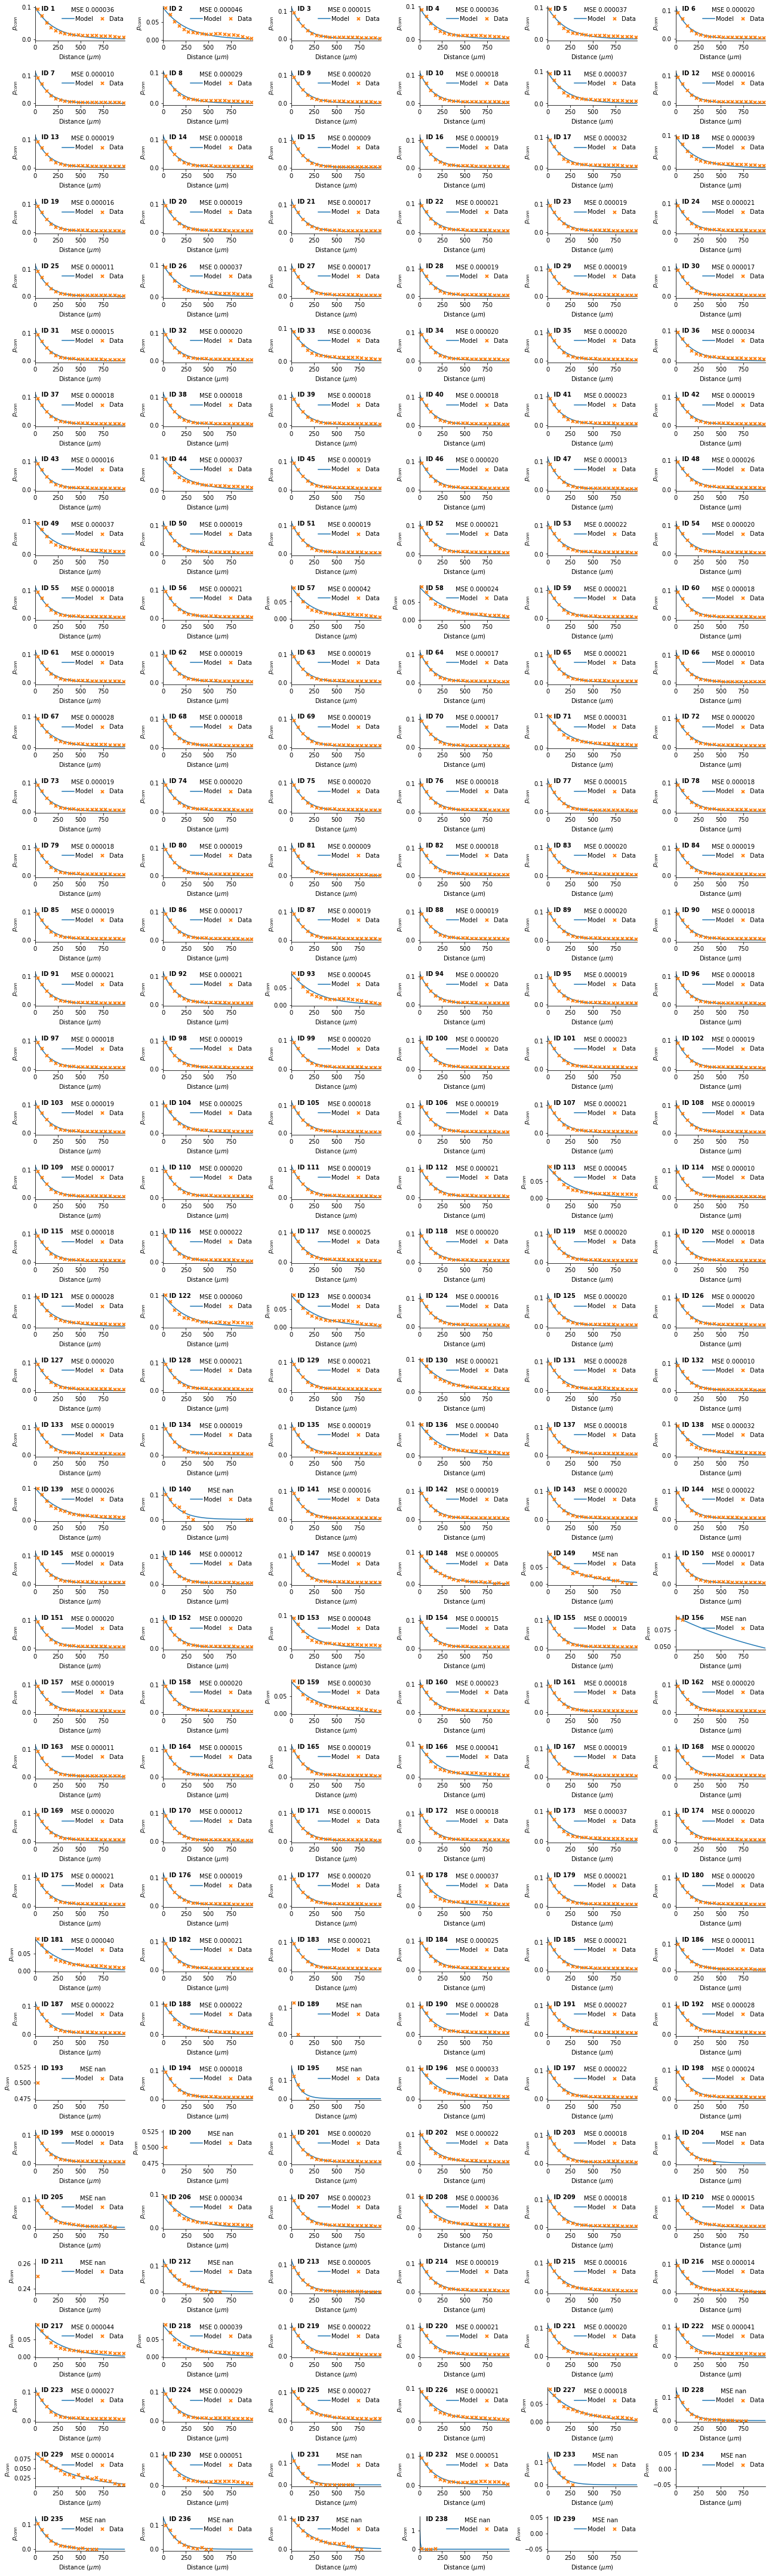

In [41]:
# Plot selected columns
sub_ids_sel = list(range(1, 240))
ncolmax = 6

ncol = np.minimum(len(sub_ids_sel), ncolmax)
nrow = np.ceil(len(sub_ids_sel) / ncol).astype(int)
plt.figure(figsize=(ncol * 3, nrow * 1.5))
for idx, sid in enumerate(sub_ids_sel):
    model_name = f"TAP_DD2_SubID{sid}"
    data_file = os.path.join(model_path, model_name + "__data.pickle")
    model_file = os.path.join(model_path, model_name + "__model.pickle")
    mse_file = os.path.join(model_path, model_name + "__MSE.pickle")
    with open(data_file, "rb") as f:
        data_dict = pickle.load(f)
    with open(model_file, "rb") as f:
        model_dict = pickle.load(f)
    with open(mse_file, "rb") as f:
        mse_dict = pickle.load(f)

    d_data = get_bin_centers(data_dict["dist_bins"])  # Distance at bin centers
    p_data = data_dict["p_conn_dist"]  # Probability in data bins

    m_fct = modelling.get_model_function(**model_dict)
    d_model = np.arange(0, max(data_dict["dist_bins"]), 10)
    p_model = m_fct(d_model)

    mse = mse_dict['MSE']

    plt.subplot(nrow, ncol, idx + 1)
    plt.plot(d_model, p_model, color="tab:blue", label='Model')
    plt.plot(d_data, p_data, "x", color="tab:orange", ms=5, markeredgewidth=2, label="Data")
    plt.xlim([min(d_model), max(d_model)])
    plt.text(np.min(plt.xlim()), np.max(plt.ylim()), f"   ID {sid} ", ha="left", va="top", fontweight="bold", zorder=0)
    plt.gca().spines[["right", "top"]].set_visible(False)
    plt.xlabel("Distance ($\mu m$)")
    plt.ylabel("$p_{conn}$")
    plt.legend(loc="upper right", borderpad=0.0, borderaxespad=0.2, columnspacing=0.5, handletextpad=0.2, title=f"MSE {mse:.6f}", ncol=2, frameon=False)
plt.tight_layout()
plt.show()


## Simplices

We would like to analyze higher order statistics of simplices than the
humble simplex counts. We could save simplices as lists for each
subtarget input. However this data can be large. To reduce the computed
data's size, we can compute statistics on each `subtarget`'s simplices,

In [ ]:
def node_participation(simplices):
    """Compute node participation from DataFrame of simplices,
    containing a list of simplices in each row.
    """
    return simplices.apply(lambda column: column.value_counts(), axis=0).fillna(0).astype(int)


or for edge participation,

In [ ]:
def edge_participation(simplices):
    """Compute node participation from DataFrame of simplices,
    containing a list of simplices in each row.
    """
    edge_positions = list(range(simplices.shape[1]))[:-1]

    def value_count_edge(position):
        counts = simplices[ [position, position+1] ].value_counts().rename(position)
        counts.index.rename(["source", "target"], inplace=True)
        return counts

    return pd.concat([value_count_edge(p) for p in edge_positions], axis=1).fillna(0).astype(int)


# Scratch